In [20]:
#Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error

In [3]:
data = pd.read_csv('../diabetes.csv')

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
select_col = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [13]:
select_col_df = data[select_col]
select_col_df = select_col_df.describe()
select_col_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578
std,31.972618,19.355807,15.952218,115.244002,7.884160
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000
50%,117.000000,72.000000,23.000000,30.500000,32.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000
max,199.000000,122.000000,99.000000,846.000000,67.100000


In [14]:
mean_value = select_col_df.iloc[1:2, :].values[0]
mean_value

array([120.89453125,  69.10546875,  20.53645833,  79.79947917,
        31.99257812])

In [18]:
for col in data[select_col]:

    data.replace({col: {0: data[col].median()}}, inplace=True)

In [19]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


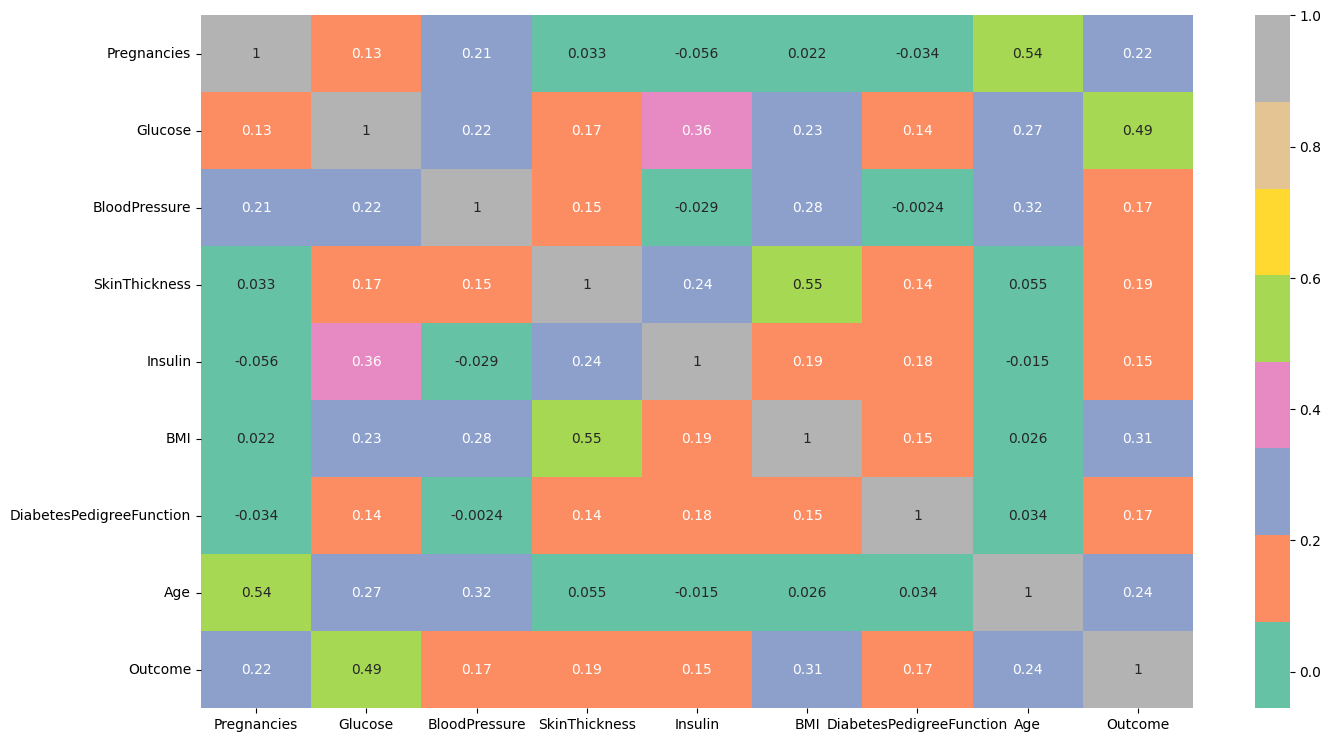

In [21]:
plt.figure(figsize=(16,9))

sns.heatmap(data.corr(), annot=True, cmap='Set2')

plt.show()

In [22]:
X = data.iloc[:,:8]
Y = data.iloc[:,8:]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=1)

In [23]:
def impression(model, accuracy):
    print('Accuracy : {} %'.format(accuracy))
    print('mean_squared_error : ', round(mean_squared_error(Y_test, Y_pred), 3))

    cm = confusion_matrix(Y_test, Y_pred)

    class_label = [0,1]

    df = pd.DataFrame(cm, index=class_label, columns=class_label)

    sns.heatmap(df, annot=True, linewidths=2, fmt='d', cmap='Set2')

    plt.title('Confusion Matrix')

    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

Accuracy : 73.37700000000001 %
mean_squared_error :  0.266


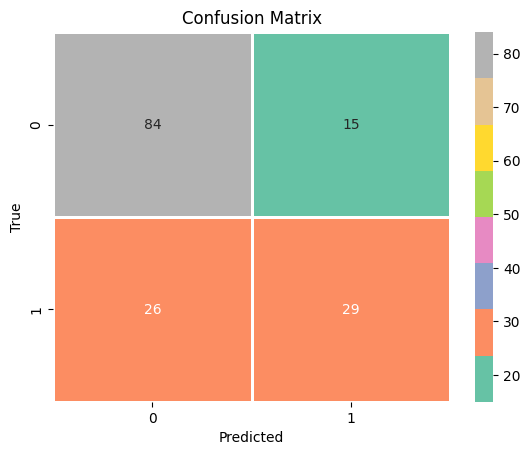

In [24]:
tree = DecisionTreeClassifier(max_depth=8)

tree.fit(X_train, Y_train)

Y_pred = tree.predict(X_test)

tree_accuracy = round(accuracy_score(Y_test, Y_pred), 5) * 100

impression(tree, tree_accuracy)

Accuracy : 79.221 %
mean_squared_error :  0.208


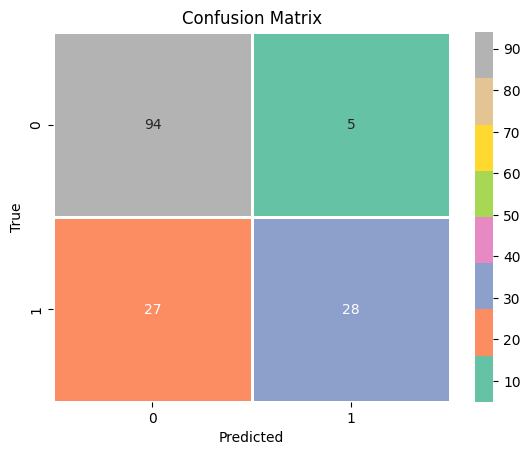

In [26]:
svc = SVC()

Y_train = np.ravel(Y_train)

svc.fit(X_train, Y_train)

Y_pred = svc.predict(X_test)

svc_accuracy = round(accuracy_score(Y_test, Y_pred), 5) * 100

impression(svc, svc_accuracy)

In [32]:
def KNN(index):
     global knn;
     knn = KNeighborsClassifier(n_neighbors=index)
     knn.fit(X_train, Y_train)

    
scores = []

for i in range(1,30):
    KNN(i)
    Y_pred = knn.predict(X_test)
    scores.append( round(accuracy_score(Y_test, Y_pred), 5) * 100)

In [33]:
max = np.argmax(np.array(scores)) + 1
max

6

In [35]:
Y_pred = knn.predict(X_test)
knn_accuracy =  round(accuracy_score(Y_test, Y_pred), 5) * 100
impression(KNN(6), knn_accuracy)

AttributeError: 'NoneType' object has no attribute 'predict'